In [1]:
import numpy as np          
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd       
import seaborn as sns       
import sklearn   
from tqdm import tqdm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Загрузка и подготовка данных

In [2]:
url = "https://raw.githubusercontent.com/BelikJulia/machine-learning/main/DataSet/MP.csv"
data_raw = pd.read_csv(url)
data_raw.shape

(3000, 21)

Удалим выбросы

In [3]:
rows_to_drop = data_raw[
    (data_raw['battery_power'] < data_raw['battery_power'].quantile(0.005)) | (data_raw['battery_power'] > data_raw['battery_power'].quantile(0.995)) | 
    (data_raw['clock_speed']  < data_raw['clock_speed' ].quantile(0.005)) | (data_raw['clock_speed']  > data_raw['clock_speed' ].quantile(0.995)) | 
    (data_raw['fc']  < data_raw['fc' ].quantile(0.005)) | (data_raw['fc']  > data_raw['fc' ].quantile(0.995)) |
    (data_raw['int_memory']  < data_raw['int_memory' ].quantile(0.005)) | (data_raw['int_memory']  > data_raw['int_memory' ].quantile(0.995)) | 
    (data_raw['m_dep']  < data_raw['m_dep' ].quantile(0.005)) | (data_raw['m_dep']  > data_raw['m_dep' ].quantile(0.995)) |
    (data_raw['mobile_wt']  < data_raw['mobile_wt' ].quantile(0.005)) | (data_raw['mobile_wt']  > data_raw['mobile_wt' ].quantile(0.995)) | 
    (data_raw['pc']  < data_raw['pc' ].quantile(0.005)) | (data_raw['pc']  > data_raw['pc' ].quantile(0.995)) |
    (data_raw['px_width']  < data_raw['px_width' ].quantile(0.005)) | (data_raw['px_width']  > data_raw['px_width' ].quantile(0.995)) | 
    (data_raw['ram']  < data_raw['ram' ].quantile(0.005)) | (data_raw['ram']  > data_raw['ram' ].quantile(0.995)) |
    (data_raw['talk_time']  < data_raw['talk_time' ].quantile(0.005)) | (data_raw['talk_time']  > data_raw['talk_time' ].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(2879, 21)

In [4]:
data.dropna(axis=0, how='all', subset=['battery_power'], inplace=True)
data.dropna(axis=0, how='all', subset=['blue'], inplace=True)
data.dropna(axis=0, how='all', subset=['clock_speed'], inplace=True)
data.dropna(axis=0, how='all', subset=['dual_sim'], inplace=True)
data.dropna(axis=0, how='all', subset=['fc'], inplace=True)
data.dropna(axis=0, how='all', subset=['four_g'], inplace=True)
data.dropna(axis=0, how='all', subset=['int_memory'], inplace=True)
data.dropna(axis=0, how='all', subset=['m_dep'], inplace=True)
data.dropna(axis=0, how='all', subset=['mobile_wt'], inplace=True)
data.dropna(axis=0, how='all', subset=['n_cores'], inplace=True)
data.dropna(axis=0, how='all', subset=['pc'], inplace=True)
data.dropna(axis=0, how='all', subset=['px_height'], inplace=True)
data.dropna(axis=0, how='all', subset=['px_width'], inplace=True)
data.dropna(axis=0, how='all', subset=['ram'], inplace=True)
data.dropna(axis=0, how='all', subset=['sc_h'], inplace=True)
data.dropna(axis=0, how='all', subset=['sc_w'], inplace=True)
data.dropna(axis=0, how='all', subset=['talk_time'], inplace=True)
data.dropna(axis=0, how='all', subset=['three_g'], inplace=True)
data.dropna(axis=0, how='all', subset=['touch_screen'], inplace=True)
data.dropna(axis=0, how='all', subset=['wifi'], inplace=True)
print(data.shape)
data.isna().sum()

(2721, 21)


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Проведем нормализацию

In [5]:
data_norm = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
data_norm.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,...,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000
mean,0.494282,0.488423,0.409247,0.508269,0.238985,0.514149,0.490190,0.448242,0.506517,0.504069,...,0.327427,0.499883,0.505929,0.524203,0.318857,0.498489,0.755972,0.505696,0.514884,0.507902
std,0.293952,0.499958,0.328669,0.500024,0.241883,0.499892,0.293178,0.318928,0.294342,0.326937,...,0.226641,0.289104,0.292533,0.300177,0.242910,0.301650,0.429588,0.500059,0.499870,0.373484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.233557,0.000000,0.080000,0.000000,0.055556,0.000000,0.225806,0.111111,0.241667,0.285714,...,0.140306,0.247811,0.254531,0.285714,0.111111,0.222222,1.000000,0.000000,0.000000,0.333333
50%,0.489933,0.000000,0.400000,1.000000,0.166667,1.000000,0.483871,0.444444,0.516667,0.428571,...,0.286224,0.498316,0.520151,0.500000,0.277778,0.500000,1.000000,1.000000,1.000000,0.666667
75%,0.746980,1.000000,0.680000,1.000000,0.388889,1.000000,0.741935,0.777778,0.758333,0.857143,...,0.485204,0.750168,0.757371,0.785714,0.500000,0.777778,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 2. Разбиение данных на обучающую и тестовую выборки

In [6]:
X = data_norm.drop(['price_range'], axis=1)
y = data['price_range']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(2040, 681)

In [7]:
mean = X_train.mean(axis = 0)
std = X_train.std(axis = 0)

X_train = (X_train - mean) / std
X_test =  (X_test  - mean) / std

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# 3. Подбор гиперпараметров
## Подбор числа нейронов в однослойном классификаторе
В качестве  алгоритма оптимизации выберем алгоритм Adam, в качестве функции активации выберем Relu, в качетве метрики оценки классификатора возьмем accuracy_score.

In [8]:
hidden_layer_size = np.linspace(1, 60, 60)
hidden_layer_size = hidden_layer_size.astype(int)
test_err, train_err = [], []
train_acc, test_acc = [], []

for size in tqdm(hidden_layer_size):
    model = MLPClassifier(hidden_layer_sizes=(size,), 
                          solver='adam', activation='relu', max_iter=3000, random_state=13)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

100%|██████████| 60/60 [03:24<00:00,  3.41s/it]


Train: минимальное значение ошибки = 0.0, число нейронов = 14
Test: минимальное значение ошибки = 0.016152716593245228, число нейронов = 3


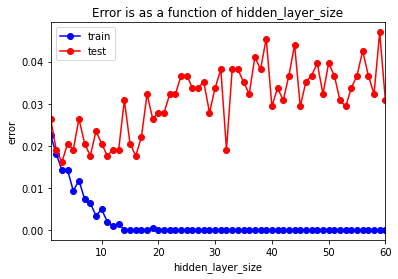

In [9]:
plt.plot(hidden_layer_size, train_err, 'b-o', label = 'train')
plt.plot(hidden_layer_size, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Error is as a function of hidden_layer_size')
plt.xlabel('hidden_layer_size')
plt.ylabel('error')
plt.legend()

print(f"Train: минимальное значение ошибки = {np.min(train_err)}, число нейронов = {hidden_layer_size[np.argmin(train_err)]}")
print(f"Test: минимальное значение ошибки = {np.min(test_err)}, число нейронов = {hidden_layer_size[np.argmin(test_err)]}")

Рассмотрим как у нас менялась метрика в зависимости от гиперпараметра

Train: максимальное значение accuracy = 1.0, число нейронов = 14
Test: максимальное значение accuracy = 0.9838472834067548, число нейронов = 3


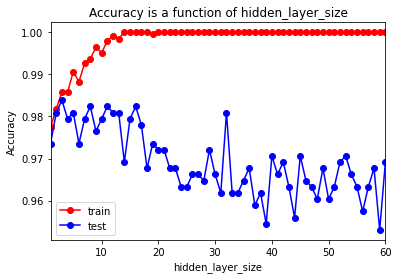

In [10]:
plt.plot(hidden_layer_size, train_acc, 'r-o', label = 'train')
plt.plot(hidden_layer_size, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Accuracy is a function of hidden_layer_size')
plt.xlabel('hidden_layer_size')
plt.ylabel('Accuracy')
plt.legend()

print(f"Train: максимальное значение accuracy = {np.max(train_acc)}, число нейронов = {hidden_layer_size[np.argmax(train_acc)]}")
print(f"Test: максимальное значение accuracy = {np.max(test_acc)}, число нейронов = {hidden_layer_size[np.argmax(test_acc)]}")

## Подбор числа нейронов в двухслойном классификаторе

In [11]:
n = 10
sizes = np.linspace(1, 60, n).astype(int)
test_err = np.zeros((n, n))
train_err = np.zeros((n, n))
train_acc = np.zeros((n, n))
test_acc = np.zeros((n, n))

for i, size_1 in tqdm(enumerate(sizes)):
    for j, size_2 in enumerate(sizes):
        model = MLPClassifier(hidden_layer_sizes=(size_1, size_2, ), 
                              solver='adam', activation='relu', max_iter=3000, random_state=13)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_err[i][j] = np.mean(y_train != y_train_pred)
        test_err[i][j] = np.mean(y_test != y_test_pred)

        train_acc[i][j] = accuracy_score(y_train, y_train_pred)
        test_acc[i][j] = accuracy_score(y_test, y_test_pred)

10it [03:58, 23.81s/it]


Train: минимальное значение ошибки = 0.0, число нейронов = (1, 1)
Test: минимальное значение ошибки = 0.016152716593245228, число нейронов = (1, 1)


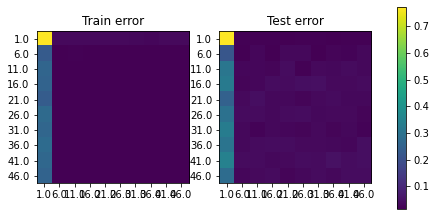

In [12]:
plt.subplot(121)
plt.title("Train error")
plt.imshow(train_err)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

plt.subplot(122)
plt.title("Test error")
plt.imshow(test_err)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

cax = plt.axes([0.96, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

train_min_loss = np.where(train_err == np.min(train_err))
test_min_loss = np.where(test_err == np.min(test_err))

train_min_loss_sizes = np.where(train_err == np.min(train_err))
print(f"Train: минимальное значение ошибки = {np.min(train_err)}, число нейронов = (" \
      f"{train_min_loss_sizes[0][0]}, {train_min_loss_sizes[1][0]})")

test_min_loss_sizes = np.where(test_err == np.min(test_err))
print(f"Test: минимальное значение ошибки = {np.min(test_err)}, число нейронов = (" \
      f"{test_min_loss_sizes[0][0]}, {test_min_loss_sizes[1][0]})")

Train: максимальное значение accuracy = 1.0, число нейронов = (1, 1)
Test: максимальное значение accuracy = 0.9838472834067548, число нейронов = (1, 1)


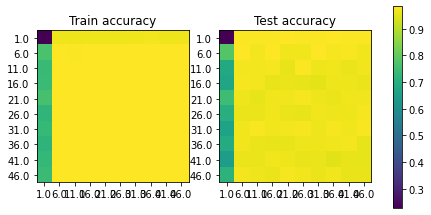

In [13]:
plt.subplot(121)
plt.title("Train accuracy")
plt.imshow(train_acc)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

plt.subplot(122)
plt.title("Test accuracy")
plt.imshow(test_acc)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

cax = plt.axes([0.95, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

train_max_acc = np.where(train_acc == np.max(train_acc))
test_max_acc = np.where(test_acc == np.max(test_acc))


train_max_acc_sizes = np.where(train_acc == np.max(train_acc))
print(f"Train: максимальное значение accuracy = {np.max(train_acc)}, число нейронов = (" \
      f"{train_max_acc_sizes[0][0]}, {train_max_acc_sizes[1][0]})")

test_max_acc_sizes = np.where(test_acc == np.max(test_acc))
print(f"Test: максимальное значение accuracy = {np.max(test_acc)}, число нейронов = (" \
      f"{test_max_acc_sizes[0][0]}, {test_max_acc_sizes[1][0]})")

## Подбор параметра регуляризации

In [14]:
alpha_arr = np.logspace(-5, 5, 50)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in tqdm(alpha_arr):
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (22,), 
                              solver='adam', activation='relu', max_iter=1000, random_state=13)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

100%|██████████| 50/50 [01:38<00:00,  1.96s/it]


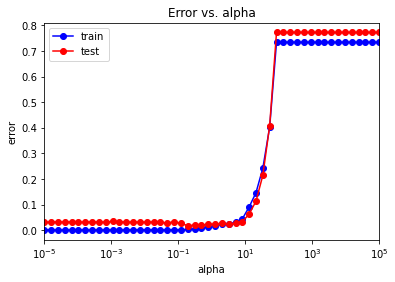

In [15]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

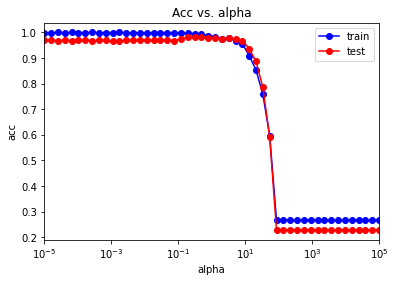

In [16]:
plt.semilogx(alpha_arr, train_acc, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Acc vs. alpha')
plt.xlabel('alpha')
plt.ylabel('acc')
plt.legend()

# Общие выводы
##  Подбор числа нейронов в однослойном классификаторе
1) Так как графики Error/Accuracy для train/test почти полностью совпадают, делаем вывод об одиноковом распределении тренировочных и тестовых данных.

2) Переобучения нет, следовательно в моделе нет высоких весовых значений и она достаточно простая, чтобы уметь обобщаться.

3) Недообучения так же нет, то есть модель достаточно сложная, чтобы решить поставленную задачу.

4) Максимальное значение accuracy = 98.4%, число нейронов = 3

## Подбор числа нейронов в двухслойном классификаторе
1) Переобучения и недобучения также нет.

2) Максимальное значение accuracy = 98.4%, число нейронов = (1, 1)

3) Число нейронов уменьшилось на 1, значение accuracy не изменилось

## Подбор параметра регуляризации
C ростом коэффициента регуляризации растет ошибка и падает accuracy, что говорит о том, что после обучения у модели не возникает больших значения весовых коэффициентов, а значит нет переобучения у модели.